In [11]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(24,20))
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import os
os.sys.path.append('/Users/schr476/Documents/DOE-HEP/AcceletorControlWithAi/control-for-accelerators-in-hep-github/')

In [23]:
import dataprep.dataset as dp
df = dp.load_data('../data/MLParamData_1583906408.4261804_From_MLrn_2020-03-10+00_00_00_to_2020-03-11+00_00_00.h5_processed.csv.gz',0,100000)
print(list(df.columns.values) )

['time', 'B:ACMNPG', 'B:GMPS4V', 'B:IMINER', 'B:LINFRQ', 'B:VIMAX', 'B:VIMIN', 'B:VINHBT', 'B:VIPHAS', 'B_ACMNPG', 'B_VIMIN', 'B_VINHBT', 'I:IB', 'I:MDAT40', 'I:MXIB']


In [13]:
import numpy as np 
from sklearn.gaussian_process.kernels import ConstantKernel, WhiteKernel, Matern, Sum, Product
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.gaussian_process import GaussianProcessRegressor
noise = 1e-3
kernel = ConstantKernel(1.0) * Matern(length_scale=1.0, nu=2.5) + WhiteKernel()
gpr = GaussianProcessRegressor(kernel=kernel, alpha=noise**2)
nsamples=5000
X=np.array(df["B:VIMIN"][0:nsamples]).reshape(-1,1)
Y=np.array(df["B:IMINER"][0:nsamples]).reshape(-1,1)

In [14]:
def train(gpr, X_init,Y_init):
    gpr.fit(X_init,Y_init)
    print("Initial: %s\nOptimum: %s" % (kernel, gpr.kernel_))
    score = gpr.score(X_init, Y_init)
    print("Score: %s" % (score))
    return 0
##
train(gpr,X,Y)

Initial: 1**2 * Matern(length_scale=1, nu=2.5) + WhiteKernel(noise_level=1)
Optimum: 9.28**2 * Matern(length_scale=2.31, nu=2.5) + WhiteKernel(noise_level=0.00706)
Score: 0.8340201713834665


0

In [27]:
X_plot = X=np.array(df["B:VIMIN"][8000:9000]).reshape(-1,1)
y_gpr, y_std = gpr.predict(X_plot, return_std=True)
Y_plot = X=np.array(df["B:IMINER"][8000:9000]).reshape(-1,1)
X_gpr = np.linspace(0, 1000, 1000)
y_std = y_std.reshape(y_gpr.shape)
y_up = (y_gpr + y_std)
y_down = (y_gpr - y_std)
print(Y_plot.shape)

(1000, 1)


(0, 1000)

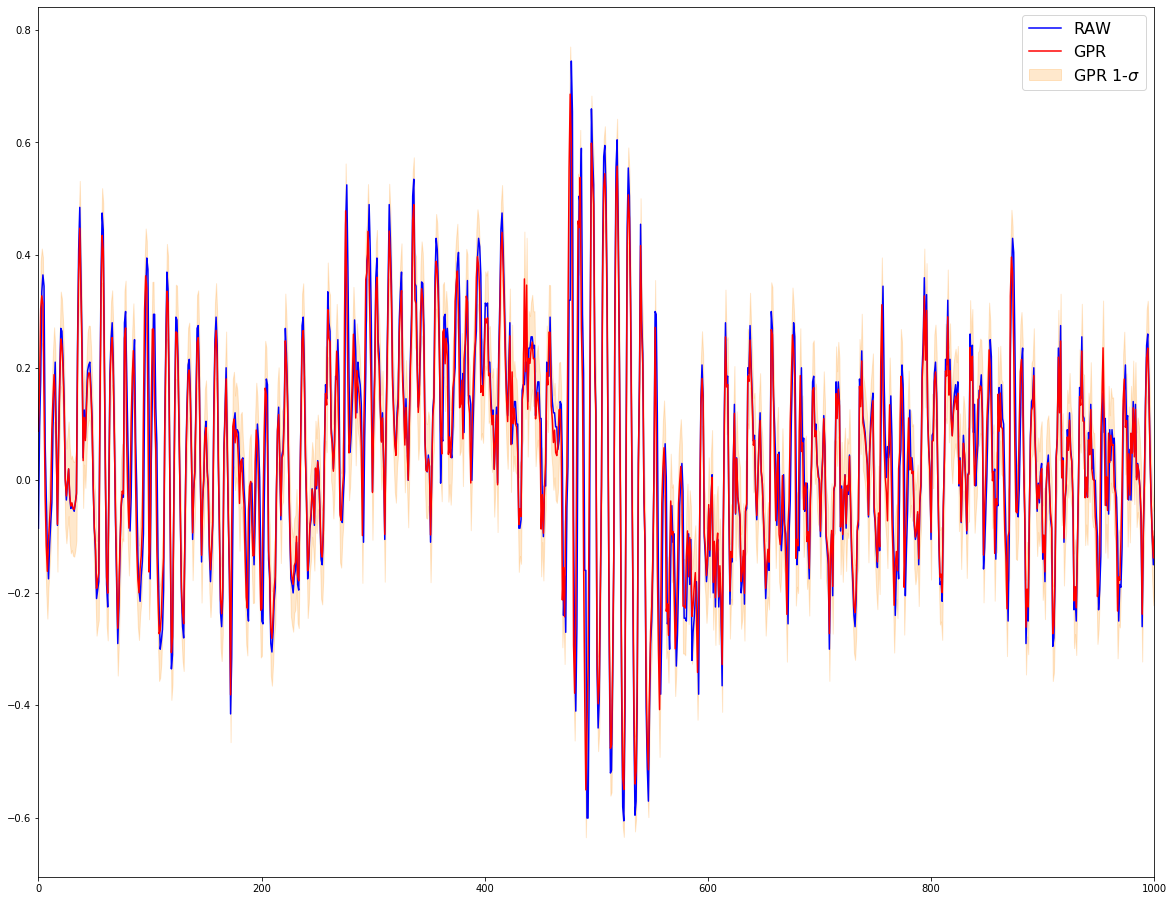

In [29]:
plt.rc('legend',**{'fontsize':16})
figure(figsize=(20,16))
plt.plot(X_gpr,Y_plot, color='blue',label='RAW' )
plt.plot(X_gpr,y_gpr, color='red',label='GPR' )
plt.fill_between(X_gpr, y_up[:,0], y_down[:,0], color='darkorange',alpha=0.2,label='GPR 1-$\sigma$')
plt.legend()
plt.xlim(0, 1000)

In [30]:
import pickle

# save
with open('gpr_accelerator_model_5k.pkl','wb') as f:
    pickle.dump(gpr,f)

# load
with open('gpr_accelerator_model_5k.pkl', 'rb') as f:
    gpr_loaded = pickle.load(f)

gpr_loaded.predict(X[0:1])

array([[3.85604971e-39]])